In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#loading dataset
df=pd.read_csv('olympics_data.csv', encoding='latin1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [2]:
#DATA CLEANING

# Drop rows where all values are missing
df.dropna(how='all', inplace=True)

# Drop unnecessary columns
# df.drop(columns=['Gender', 'Country'], inplace=True)

# Fix data type for Year
df['Year'] = df['Year'].astype(int)

# Check for missing values
print(df.isnull().sum())

# Drop rows with any missing values (if needed)
df.dropna(inplace=True)

# Verify cleaning
df.info()


City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


In [3]:
print(df.columns)

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')


Q1 - Which City Hosted the Olympics Most Times

In [4]:
city_host_count = df[['City', 'Year']].drop_duplicates()
print(city_host_count['City'].value_counts())


City
Montreal       1
Moscow         1
Los Angeles    1
Seoul          1
Barcelona      1
Atlanta        1
Sydney         1
Athens         1
Beijing        1
Name: count, dtype: int64


Q2 - Which City Hosted Most Events

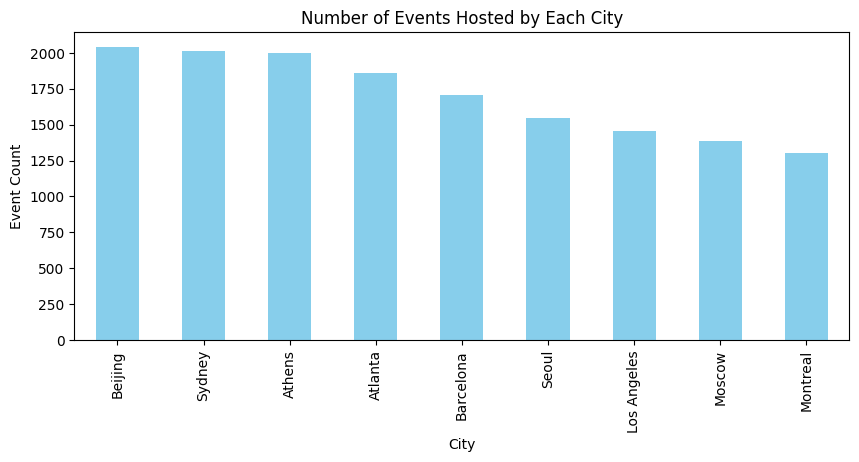

In [5]:
df['City'].value_counts().plot(kind='bar', figsize=(10,4), color='skyblue')
plt.title('Number of Events Hosted by Each City')
plt.xlabel('City')
plt.ylabel('Event Count')
plt.show()


Q3 - Unique Events and Variations

Total unique events: 334


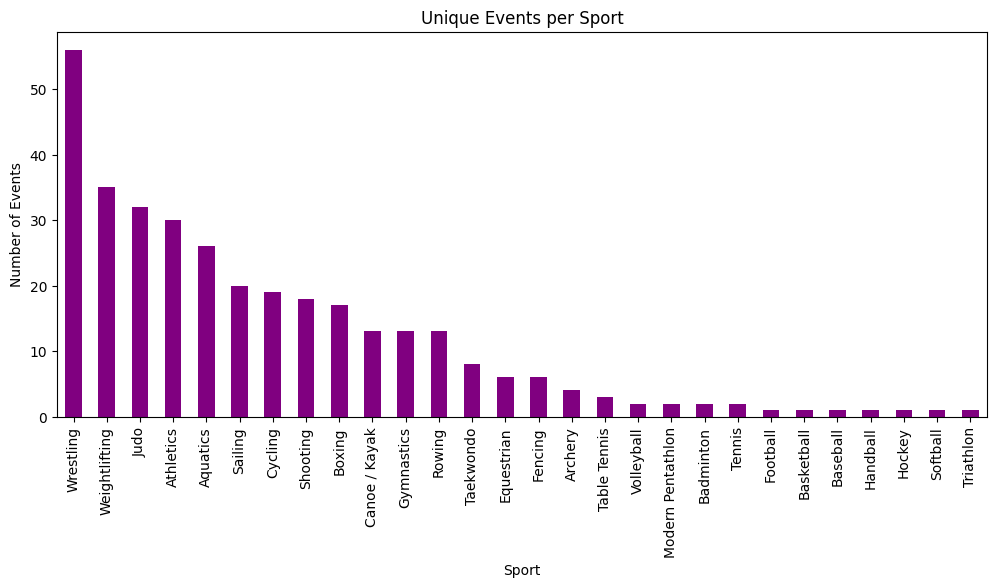

In [6]:
unique_events = df[['Sport', 'Discipline', 'Event']].drop_duplicates()
print("Total unique events:", len(unique_events))

event_count_per_sport = unique_events.groupby('Sport').size().sort_values(ascending=False)
event_count_per_sport.plot(kind='bar', figsize=(12,5), color='purple')
plt.title('Unique Events per Sport')
plt.ylabel('Number of Events')
plt.show()


Q4 - Top 10 Medal-Winning Athletes

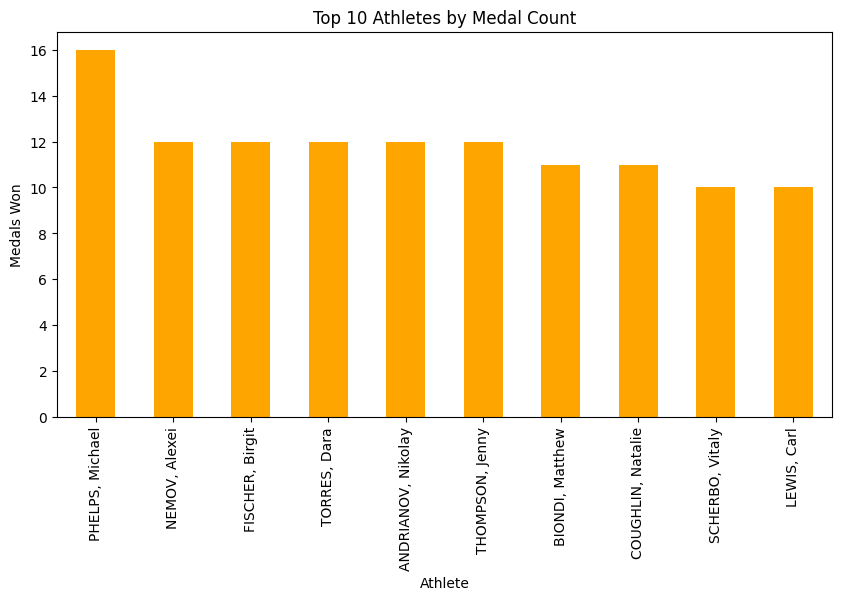

In [7]:
top_athletes = df['Athlete'].value_counts().head(10)
top_athletes.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Top 10 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Medals Won')
plt.show()


Q5 - Gender Distribution in Medals

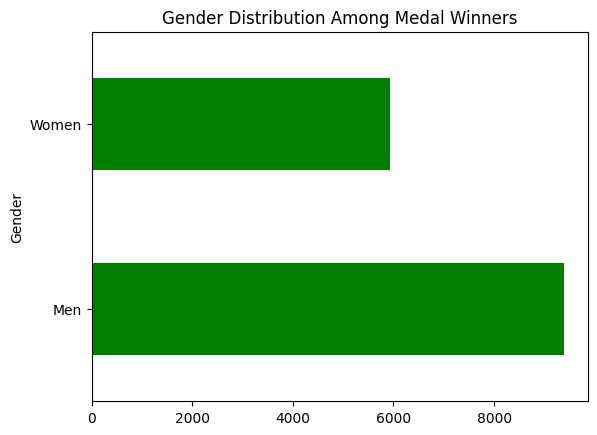

In [8]:
gender_dist = df['Gender'].value_counts()
gender_dist.plot(kind='barh', color='green')
plt.title('Gender Distribution Among Medal Winners')
plt.show()


Q6 - Top Countries by Medal Count

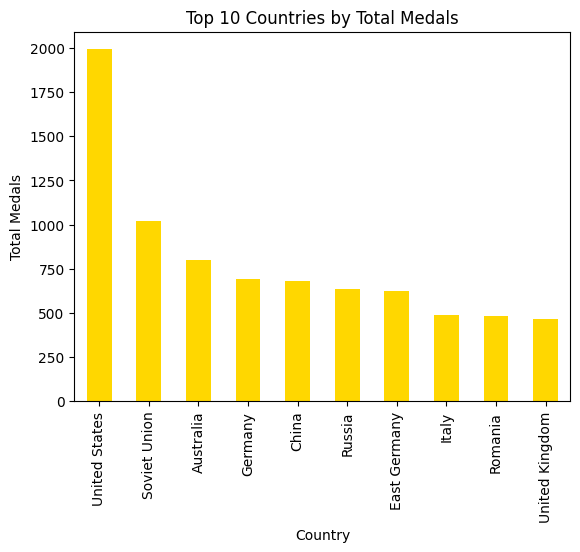

In [9]:
medals_by_country = df['Country'].value_counts().head(10)
medals_by_country.plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()


Q7 - Dominant Country in Each Sport

In [10]:
dominance = df.groupby(['Sport', 'Country']).size().reset_index(name='Count')
sport = 'Hockey'  # Try any sport like 'Swimming', 'Boxing', etc.
top = dominance[dominance['Sport'] == sport].sort_values(by='Count', ascending=False).head(5)
print(top)


      Sport       Country  Count
431  Hockey   Netherlands    159
425  Hockey     Australia    145
428  Hockey       Germany     81
435  Hockey         Spain     64
430  Hockey  Korea, South     48


Q8 - Athletes Who Switched Sports

In [11]:
ath_sport = df[['Athlete', 'Sport']].drop_duplicates()
multi_sport_athletes = ath_sport.groupby('Athlete').filter(lambda x: len(x['Sport'].unique()) > 1)
print(multi_sport_athletes.sort_values('Athlete'))


                    Athlete          Sport
10593         BELOVA, Irina     Gymnastics
6196          BELOVA, Irina      Athletics
13261            CHEN, Jing     Volleyball
5611             CHEN, Jing   Table Tennis
2692       DIMITROV, Stefan     Volleyball
2722       DIMITROV, Stefan  Weightlifting
6898         GAVRILOV, Yuri       Handball
2089         GAVRILOV, Yuri       Football
8667         GONZALEZ, Raul       Handball
3018         GONZALEZ, Raul      Athletics
209     KOLESNIKOV, Nikolai      Athletics
1360    KOLESNIKOV, Nikolai  Weightlifting
2771         KOVACS, Istvan      Wrestling
6429         KOVACS, Istvan         Boxing
6019   KOVALENKO, Alexandre       Aquatics
4535   KOVALENKO, Alexandre      Athletics
1097     KUZNETSOV, Mikhail         Rowing
14223    KUZNETSOV, Mikhail  Canoe / Kayak
1058     KUZNETSOV, Nikolai         Rowing
8297     KUZNETSOV, Nikolai        Cycling
8792         LEE, Eun Kyung         Hockey
6047         LEE, Eun Kyung        Archery
9390       

Q9 - Medal Trend Over Time by Country (Simplified)

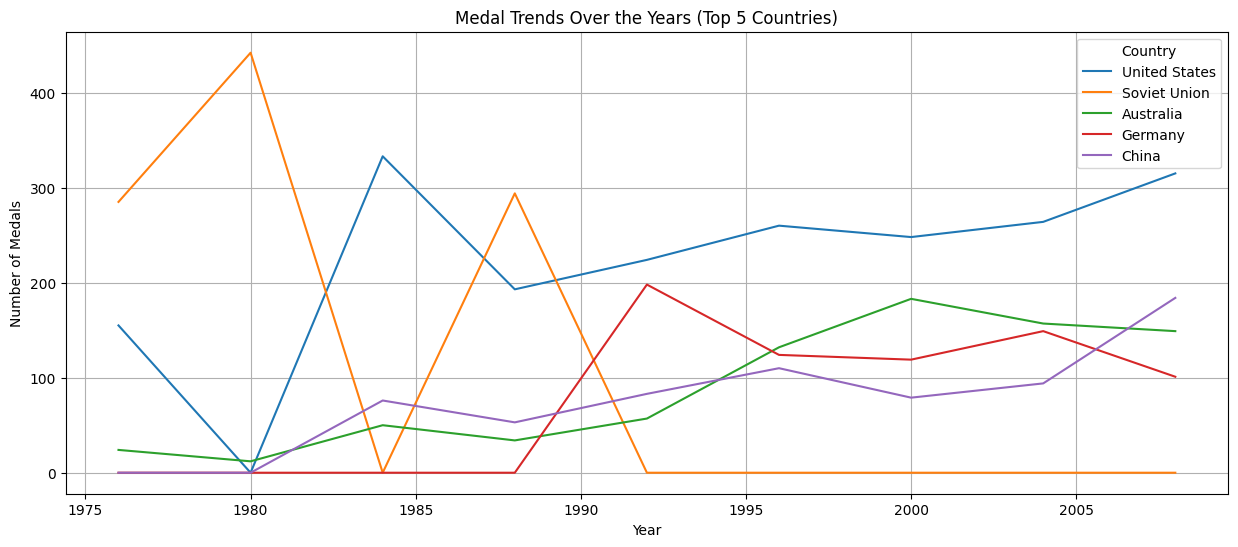

In [12]:
medal_trend = df.groupby(['Year', 'Country'])['Medal'].count().reset_index()
pivot_table = medal_trend.pivot(index='Year', columns='Country', values='Medal').fillna(0)
top_countries = pivot_table.sum().sort_values(ascending=False).head(5).index
pivot_table[top_countries].plot(kind='line', figsize=(15, 6))
plt.title('Medal Trends Over the Years (Top 5 Countries)')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()
